In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind

In [2]:
df = pd.read_csv('stud_math.csv')
df2 = pd.read_csv('stud_math.csv')

Суть проекта — отследить влияние условий жизни учащихся в возрасте от 15 до 22 лет на их успеваемость по математике, чтобы на ранней стадии выявлять студентов, находящихся в группе риска.

Для этого у нас имеется различные данные об ученике, из которых можно попытаться рассчитать коэффициент благополучия.

Т.к. данных не много, ведем две копии DataFrame.
На df смотрим данные и делаем логические выводы, в df2 попытаемся преобразовать данные по каждому критерии в оценку благополучия что позволит в итоге подсчитать общую оценку благополучия ученика и сделать корреляционный анализ с баллами по гос экз по математике.

In [3]:
def statusCounts(ser):
    print('Статистика по : '+ser.name)
    print('Всего : ' + str(len(ser)))
    print('Уникальных : ' + str(len(ser.value_counts())))
    print('Сумма уникальных : ' + str(ser.value_counts().sum()))
    print('Пустых : ' + str(len(ser) - ser.value_counts().sum()))

    if ser.dtype == 'O':
        #print('Undefined : ' + list(returnUpdateTheVoid(ser).loc['Undefined']))
        display(returnUpdateTheVoid(ser).value_counts())
        returnUpdateTheVoid(ser).hist()
    else:
        display(ser.value_counts())
        display(ser.describe())

        sns.boxplot(x=ser)

In [4]:
# None or Nan in Empty string
def returnUpdateTheVoid(ser):
    if ser.dtype == 'O':
        return ser.apply(lambda x: 'Undefined' if (x != x) | (x == None) else x)
   # else:
        # return ser.apply(lambda x: -0.00001 if (x != x) | (x == None) else x)

In [5]:
def returnNotTheVoid(ser):
    return ser[ser]

In [6]:
display(df.head())
df.info()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,...,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,...,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,...,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,...,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,...,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

Статистика по : school
Всего : 395
Уникальных : 2
Сумма уникальных : 395
Пустых : 0


GP    349
MS     46
Name: school, dtype: int64

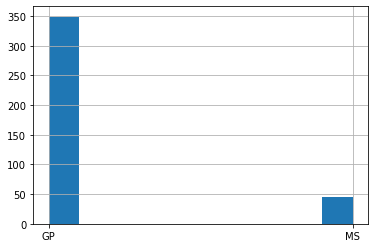

In [7]:
statusCounts(df['school'])

В вопросе влияний условий жизни на оценку, данные бесполезны!

Статистика по : sex
Всего : 395
Уникальных : 2
Сумма уникальных : 395
Пустых : 0


F    208
M    187
Name: sex, dtype: int64

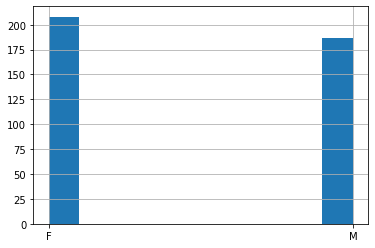

In [8]:
statusCounts(df['sex'])

В вопросе влияний условий жизни на оценку, данные бесполезны!

Статистика по : age
Всего : 395
Уникальных : 8
Сумма уникальных : 395
Пустых : 0


16    104
17     98
15     82
18     82
19     24
20      3
21      1
22      1
Name: age, dtype: int64

count    395.000000
mean      16.696203
std        1.276043
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       22.000000
Name: age, dtype: float64

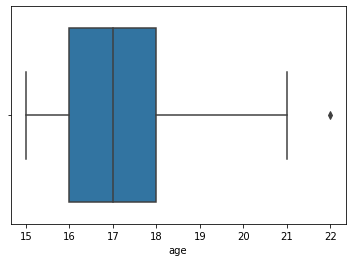

In [9]:
statusCounts(df['age'])

Данный выброс не целесообразно выкидывать.

В вопросе влияний условий жизни на оценку, данные бесполезны!

Статистика по : address
Всего : 395
Уникальных : 2
Сумма уникальных : 378
Пустых : 17


U            295
R             83
Undefined     17
Name: address, dtype: int64

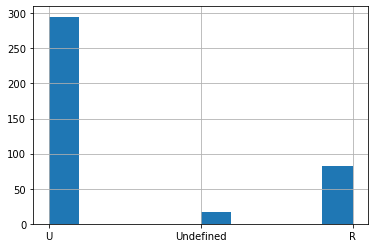

In [10]:
statusCounts(df['address'])

Разницы между городским и сельскими жителями в основном нет. НО! Общество которое нас окружает, формирует нас, а в городское общество более развито по уровню жизни и интеллектуальному развитию в львиной доли!

Даём городским жителям 100 балов.

Сельским 99 балов.

Так же имеются пропуски, даём им 99.5 балов.

PS. Возможно такой вывод кому та покажется не приемлемый, но это честно и логично. Такой вывод существенно не повлияет на итоговую корреляцию

Статистика по : address
Всего : 395
Уникальных : 3
Сумма уникальных : 395
Пустых : 0


100.0    295
99.0      83
99.5      17
Name: address, dtype: int64

count    395.000000
mean      99.768354
std        0.409452
min       99.000000
25%       99.500000
50%      100.000000
75%      100.000000
max      100.000000
Name: address, dtype: float64

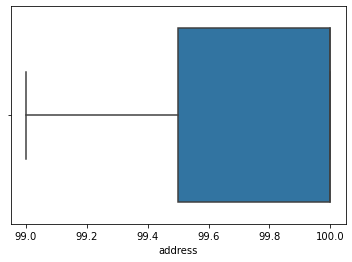

In [11]:
df2['address'] = df2['address'].map({'U': 100, 'R': 99})
df2['address'] = df2['address'].fillna(99.5)
statusCounts(df2['address'])

Создаем колонку коэффициента благополучия и начинаем накапливать.

Статистика по : welfare
Всего : 395
Уникальных : 3
Сумма уникальных : 395
Пустых : 0


100.0    295
99.0      83
99.5      17
Name: welfare, dtype: int64

count    395.000000
mean      99.768354
std        0.409452
min       99.000000
25%       99.500000
50%      100.000000
75%      100.000000
max      100.000000
Name: welfare, dtype: float64

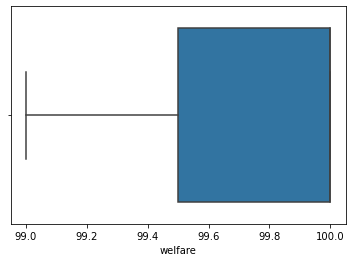

In [12]:
df2['welfare'] = 0
df2['welfare'] += df2['address']
statusCounts(df2['welfare'])

Статистика по : famsize
Всего : 395
Уникальных : 2
Сумма уникальных : 368
Пустых : 27


GT3          261
LE3          107
Undefined     27
Name: famsize, dtype: int64

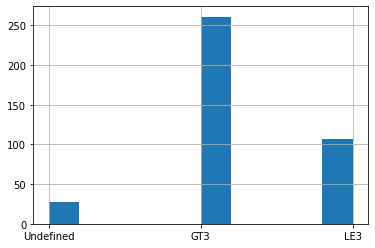

In [13]:
statusCounts(df['famsize'])

Данные не конкретны! Но можно сделать точный вывод что семья меньше 3 это либо ученик без мамы или папы.

Так же, имеются пустые данные.

О семье больше 3 членов нельзя говорить на 100 процентов что она полная, возможно она многодетная с одним родителем ну или опекуном итп.

Сложно говорить об этих данных на влияния благополучия так как каждый случай индивидуален, можно было бы его связать с образованием родителем или какими та другими данными и сделать более точный логический вывод.

Но сделаем грубый вывод оценивая львиную долю подобных семей.
У детей в неполной семье менее блогиприятные условия для обучения чем в полной.

GT3 = 100

LT3 = 99

Пустые = 99.5

PS. Такой вывод существенно не повлияет на итоговую корреляцию

Статистика по : famsize
Всего : 395
Уникальных : 3
Сумма уникальных : 395
Пустых : 0


100.0    261
99.0     107
99.5      27
Name: famsize, dtype: int64

count    395.000000
mean      99.694937
std        0.442047
min       99.000000
25%       99.000000
50%      100.000000
75%      100.000000
max      100.000000
Name: famsize, dtype: float64

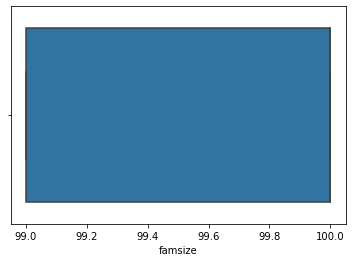

In [14]:
df2['famsize'] = df2['famsize'].map({'GT3': 100, 'LE3': 99})
df2['famsize'] = df2['famsize'].fillna(99.5)
statusCounts(df2['famsize'])

Статистика по : welfare
Всего : 395
Уникальных : 3
Сумма уникальных : 395
Пустых : 0


200.0    295
198.0     83
199.0     17
Name: welfare, dtype: int64

count    395.000000
mean     199.536709
std        0.818904
min      198.000000
25%      199.000000
50%      200.000000
75%      200.000000
max      200.000000
Name: welfare, dtype: float64

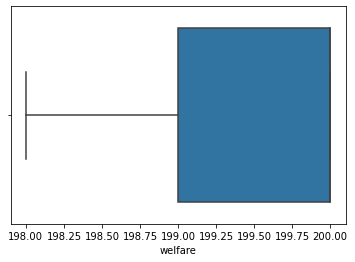

In [15]:
df2['welfare'] += df2['address']
statusCounts(df2['welfare'])

Статистика по : Pstatus
Всего : 395
Уникальных : 2
Сумма уникальных : 350
Пустых : 45


T            314
Undefined     45
A             36
Name: Pstatus, dtype: int64

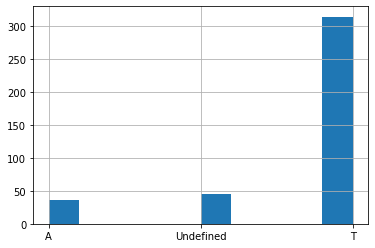

In [16]:
statusCounts(df['Pstatus'])

Об учениках которые живут с родителями в любом случае можно говорить что на них оказывается родительский контроль обучения и мотивационного давления более в вопросах обучения больше чем на учеников живущих без родителей. Также у учеников живущих без родителей появляется больше воли на контроль своего времени ... Думаю ход мыслей понятен.

T = 100 б

A = 99 б

Пропуски 99.5


Статистика по : Pstatus
Всего : 395
Уникальных : 3
Сумма уникальных : 395
Пустых : 0


100.0    314
99.5      45
99.0      36
Name: Pstatus, dtype: int64

count    395.000000
mean      99.851899
std        0.312944
min       99.000000
25%      100.000000
50%      100.000000
75%      100.000000
max      100.000000
Name: Pstatus, dtype: float64

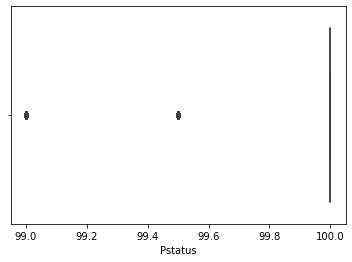

In [17]:
df2['Pstatus'] = df2['Pstatus'].map({'T': 100, 'A': 99})
df2['Pstatus'] = df2['Pstatus'].fillna(99.5)
statusCounts(df2['Pstatus'])

Статистика по : welfare
Всего : 395
Уникальных : 7
Сумма уникальных : 395
Пустых : 0


300.0    229
298.0     73
299.0     43
299.5     37
297.5      7
297.0      5
298.5      1
Name: welfare, dtype: int64

count    395.000000
mean     299.388608
std        0.854369
min      297.000000
25%      299.000000
50%      300.000000
75%      300.000000
max      300.000000
Name: welfare, dtype: float64

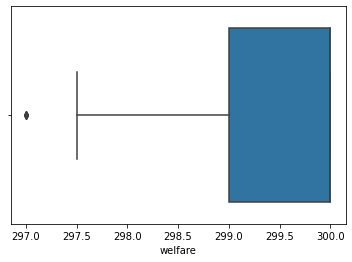

In [18]:
df2['welfare'] += df2['Pstatus']
statusCounts(df2['welfare'])

Статистика по : Medu
Всего : 395
Уникальных : 5
Сумма уникальных : 392
Пустых : 3


4.0    131
2.0    102
3.0     97
1.0     59
0.0      3
Name: Medu, dtype: int64

count    392.000000
mean       2.750000
std        1.098127
min        0.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        4.000000
Name: Medu, dtype: float64

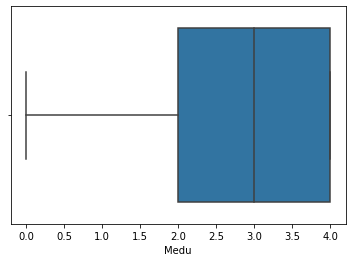

In [19]:
statusCounts(df['Medu'])

Образования матери говорит о ее интеллекте и следственно от уровня интеллекта вытекает уровень мотивационного давления на ребенка...

4 = 100 б

3 = 99.5 б

2 = 99 б

1 = 98 б

0 = 97

Пропуски = 98.7

PS. Это грубо, но в лвинной доли это так

Статистика по : Medu
Всего : 395
Уникальных : 6
Сумма уникальных : 395
Пустых : 0


100.0    131
99.0     102
99.5      97
98.0      59
97.0       3
98.7       3
Name: Medu, dtype: int64

count    395.000000
mean      99.287595
std        0.701429
min       97.000000
25%       99.000000
50%       99.500000
75%      100.000000
max      100.000000
Name: Medu, dtype: float64

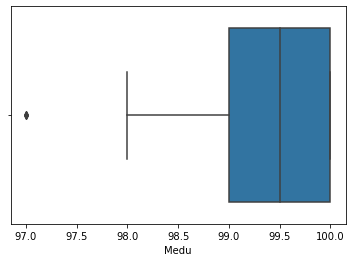

In [20]:
df2['Medu'] = df2['Medu'].map({4: 100, 3: 99.5, 2: 99, 1: 98, 0: 97})
df2['Medu'] = df2['Medu'].fillna(98.7)
statusCounts(df2['Medu'])

Статистика по : welfare
Всего : 395
Уникальных : 14
Сумма уникальных : 395
Пустых : 0


400.0    88
399.0    85
398.0    59
399.5    57
397.0    30
398.5    25
397.5    24
396.0    17
396.5     4
395.5     2
396.2     1
395.0     1
398.2     1
397.7     1
Name: welfare, dtype: int64

count    395.000000
mean     398.676203
std        1.158456
min      395.000000
25%      398.000000
50%      399.000000
75%      399.500000
max      400.000000
Name: welfare, dtype: float64

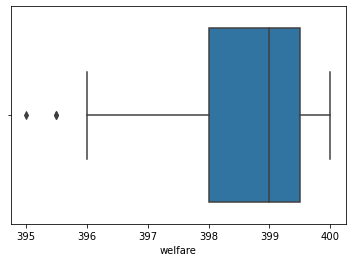

In [21]:
df2['welfare'] += df2['Medu']
statusCounts(df2['welfare'])

Статистика по : Fedu
Всего : 395
Уникальных : 6
Сумма уникальных : 371
Пустых : 24


2.0     106
3.0      96
4.0      88
1.0      78
0.0       2
40.0      1
Name: Fedu, dtype: int64

count    371.000000
mean       2.614555
std        2.228732
min        0.000000
25%        2.000000
50%        2.000000
75%        3.000000
max       40.000000
Name: Fedu, dtype: float64

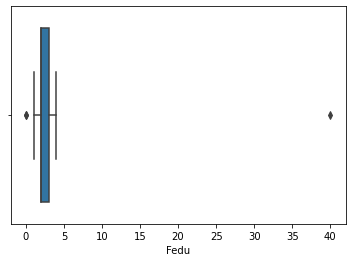

In [22]:
statusCounts(df['Fedu'])

Аналогично и матери... Так же есть значения 40, скорее всего ошибка ввода в котором хотели поставить 4. И! "Cлово" отца более "Сильное" в вопросе мотивационного давления + 0.1

4 и 40 = 100.1 б

3 = 99.6 б

2 = 99.1 б

1 = 98.1 б

0 = 97.1

Пропуски = 99.6

PS. Пропуски матери и отца либо из-за того что не оказаны либо из-за того что нет родителя, в любом случае для того чтоб корреляция была честная даём среднее арифметическое.

Статистика по : Fedu
Всего : 395
Уникальных : 5
Сумма уникальных : 395
Пустых : 0


99.6     120
99.1     106
100.1     89
98.1      78
97.1       2
Name: Fedu, dtype: int64

count    395.000000
mean      99.269620
std        0.701042
min       97.100000
25%       99.100000
50%       99.600000
75%       99.600000
max      100.100000
Name: Fedu, dtype: float64

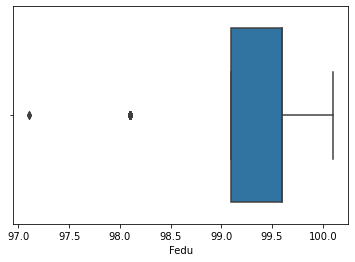

In [23]:
df2['Fedu'] = df2['Fedu'].map(
    {40: 100.1, 4: 100.1, 3: 99.6, 2: 99.1, 1: 98.1, 0: 97.1})
df2['Fedu'] = df2['Fedu'].fillna(99.6)
statusCounts(df2['Fedu'])

Статистика по : welfare
Всего : 395
Уникальных : 16
Сумма уникальных : 395
Пустых : 0


499.1    51
498.1    50
498.6    49
499.6    43
500.1    41
497.1    40
496.1    36
497.6    27
495.1    17
496.6    13
495.6    12
494.1    10
494.6     2
495.8     2
493.6     1
497.3     1
Name: welfare, dtype: int64

count    395.000000
mean     497.945823
std        1.575978
min      493.600000
25%      497.100000
50%      498.100000
75%      499.100000
max      500.100000
Name: welfare, dtype: float64

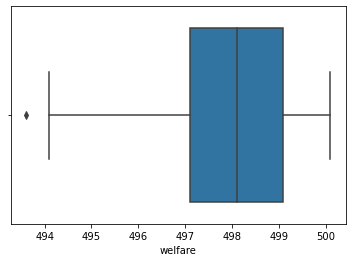

In [24]:
df2['welfare'] += df2['Fedu']
statusCounts(df2['welfare'])

Статистика по : Mjob
Всего : 395
Уникальных : 5
Сумма уникальных : 376
Пустых : 19


other        133
services      98
at_home       58
teacher       55
health        32
Undefined     19
Name: Mjob, dtype: int64

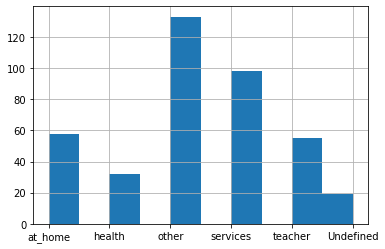

In [25]:
statusCounts(df['Mjob'])

Зная работу человека можно предположить о его морально деловых навыков и умениях.

Учитель умеет найти подход к детям, следовательно, более эффективное мотивационное давления у учителя к своим детям.

у человека в здравоохранении 100% вещее образования.

Гос служба, сложно сказать т.к много факторов, но точно образования среднее и выше.

Без работного может быть по многим причинам, но скорее всего тунеядец.

Другое и пропуски среднее арифметическое

Techer = 100 б

Health = 99.8 б

Services = 99.6 б

at_home = 99.4 б

other и пропуски = 99.7

Статистика по : Mjob
Всего : 395
Уникальных : 5
Сумма уникальных : 395
Пустых : 0


99.7     152
99.6      98
99.4      58
100.0     55
99.8      32
Name: Mjob, dtype: int64

count    395.000000
mean      99.681013
std        0.169559
min       99.400000
25%       99.600000
50%       99.700000
75%       99.700000
max      100.000000
Name: Mjob, dtype: float64

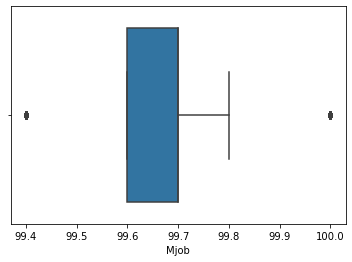

In [26]:
df2['Mjob'] = df2['Mjob'].map({'teacher': 100,
                               'health': 99.8,
                               'services': 99.6,
                               'at_home': 99.4,
                               'other': 99.7})

df2['Mjob'] = df2['Mjob'].fillna(99.7)
statusCounts(df2['Mjob'])

Статистика по : welfare
Всего : 395
Уникальных : 54
Сумма уникальных : 395
Пустых : 0


597.8    23
596.8    22
598.3    21
598.8    21
599.6    19
598.2    19
595.8    17
597.7    15
595.5    12
600.1    12
599.7    12
598.7    11
597.2    10
599.1     9
594.5     9
599.9     8
596.7     8
599.3     8
599.8     8
597.0     8
598.9     7
599.2     7
599.4     7
598.1     7
594.8     7
593.8     7
596.5     7
596.2     7
595.3     6
597.3     6
595.7     6
598.0     5
595.0     5
597.6     4
598.5     3
593.5     3
596.3     3
598.4     3
597.9     3
595.9     2
597.5     2
596.0     2
599.0     2
597.1     2
596.9     1
594.3     1
595.2     1
594.2     1
596.6     1
594.9     1
595.4     1
593.0     1
599.5     1
598.6     1
Name: welfare, dtype: int64

count    395.000000
mean     597.626835
std        1.650454
min      593.000000
25%      596.550000
50%      597.800000
75%      598.900000
max      600.100000
Name: welfare, dtype: float64

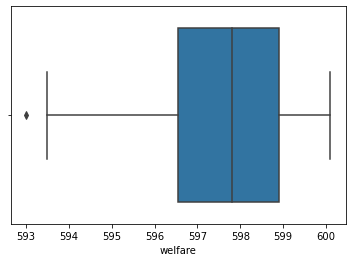

In [27]:
df2['welfare'] += df2['Mjob']
statusCounts(df2['welfare'])

Статистика по : Fjob
Всего : 395
Уникальных : 5
Сумма уникальных : 359
Пустых : 36


other        197
services     102
Undefined     36
teacher       29
at_home       16
health        15
Name: Fjob, dtype: int64

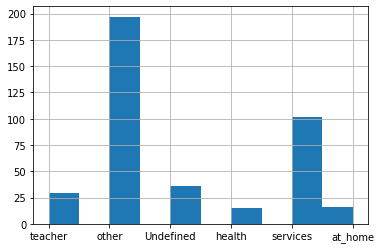

In [28]:
statusCounts(df['Fjob'])

Аналогично матери только + 0.1

Techer = 100.1 б

Health = 99.9 б

Services = 99.7 б

at_home = 99.5 б

other и пропуски = 99.775

Статистика по : Fjob
Всего : 395
Уникальных : 5
Сумма уникальных : 395
Пустых : 0


99.775     233
99.700     102
100.100     29
99.500      16
99.900      15
Name: Fjob, dtype: int64

count    395.000000
mean      99.773101
std        0.113547
min       99.500000
25%       99.700000
50%       99.775000
75%       99.775000
max      100.100000
Name: Fjob, dtype: float64

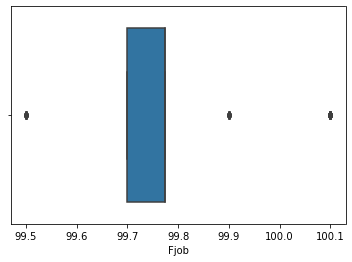

In [29]:
df2['Fjob'] = df2['Fjob'].map({'teacher': 100.1,
                               'health': 99.9,
                               'services': 99.7,
                               'at_home': 99.5,
                               'other': 99.775})

df2['Fjob'] = df2['Fjob'].fillna(99.775)
statusCounts(df2['Fjob'])

Статистика по : welfare
Всего : 395
Уникальных : 113
Сумма уникальных : 395
Пустых : 0


698.075    19
697.575    16
696.575    16
698.575    15
695.575    14
           ..
695.100     1
694.000     1
697.375     1
692.775     1
699.275     1
Name: welfare, Length: 113, dtype: int64

count    395.000000
mean     697.399937
std        1.680982
min      692.775000
25%      696.287500
50%      697.575000
75%      698.675000
max      700.200000
Name: welfare, dtype: float64

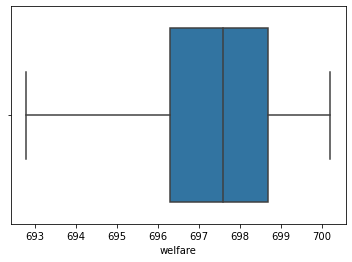

In [30]:
df2['welfare'] += df2['Fjob']
statusCounts(df2['welfare'])

Статистика по : reason
Всего : 395
Уникальных : 4
Сумма уникальных : 378
Пустых : 17


course        137
home          104
reputation    103
other          34
Undefined      17
Name: reason, dtype: int64

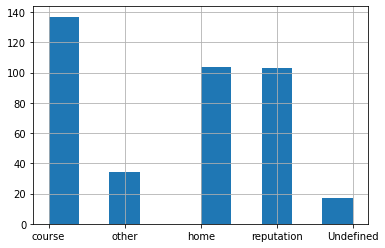

In [31]:
statusCounts(df['reason'])

Тот кто выбирал школу по программе, более заинтересован в образовании так как более глубже размышляли, тот кто выбирал школу  по рейтингу тоже молодцы, интерес в образовании есть.
Тот кто выбирал школу из ра расположенности интерес к образованию меньше относительно предыдущих пунктов, ну а другое и пропуски среднее арифметическое

course = 100б

reputation = 99.9 б

home = 99.7 б

other и пропуски = 99.87

Статистика по : reason
Всего : 395
Уникальных : 4
Сумма уникальных : 395
Пустых : 0


100.00    137
99.70     104
99.90     103
99.87      51
Name: reason, dtype: int64

count    395.000000
mean      99.878152
std        0.116934
min       99.700000
25%       99.700000
50%       99.900000
75%      100.000000
max      100.000000
Name: reason, dtype: float64

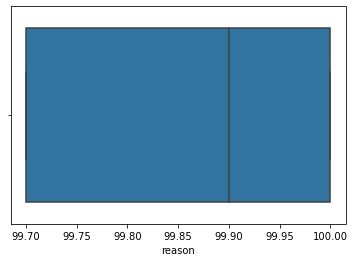

In [32]:
df2['reason'] = df2['reason'].map({'course': 100,
                                   'reputation': 99.9,
                                   'home': 99.7,
                                   'other': 99.87})

df2['reason'] = df2['reason'].fillna(99.87)
statusCounts(df2['reason'])

Статистика по : welfare
Всего : 395
Уникальных : 187
Сумма уникальных : 395
Пустых : 0


797.975    10
799.300     8
796.275     8
798.875     7
797.575     7
           ..
794.070     1
795.345     1
796.670     1
797.370     1
793.500     1
Name: welfare, Length: 187, dtype: int64

count    395.000000
mean     797.278089
std        1.677380
min      792.675000
25%      796.275000
50%      797.575000
75%      798.487500
max      800.200000
Name: welfare, dtype: float64

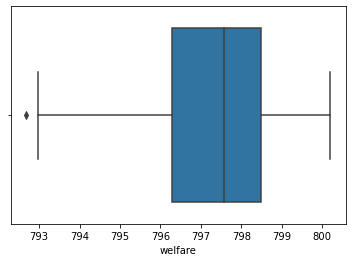

In [33]:
df2['welfare'] += df2['reason']
statusCounts(df2['welfare'])

Статистика по : guardian
Всего : 395
Уникальных : 3
Сумма уникальных : 364
Пустых : 31


mother       250
father        86
Undefined     31
other         28
Name: guardian, dtype: int64

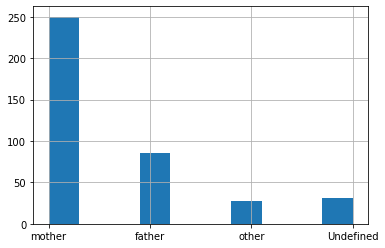

In [34]:
statusCounts(df['guardian'])

Сложно сделать логический вывод только по этим данным.
Пасс...

Статистика по : traveltime
Всего : 395
Уникальных : 4
Сумма уникальных : 367
Пустых : 28


1.0    242
2.0     96
3.0     22
4.0      7
Name: traveltime, dtype: int64

count    367.000000
mean       1.438692
std        0.694181
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        4.000000
Name: traveltime, dtype: float64

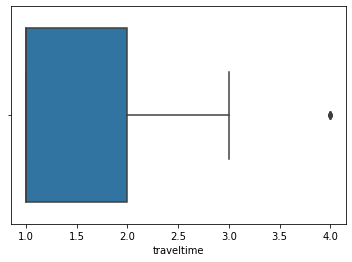

In [35]:
statusCounts(df['traveltime'])

Дорога забирает силы и энергию ...

1 = 100 б
2 = 99.99 б
3 = 99.98 б
4 = 99.97 б

Пропуски = 99.985

Статистика по : traveltime
Всего : 395
Уникальных : 5
Сумма уникальных : 395
Пустых : 0


100.000    242
99.990      96
99.985      28
99.980      22
99.970       7
Name: traveltime, dtype: int64

count    395.000000
mean      99.994861
std        0.007225
min       99.970000
25%       99.990000
50%      100.000000
75%      100.000000
max      100.000000
Name: traveltime, dtype: float64

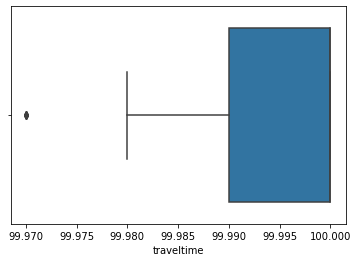

In [36]:
df2['traveltime'] = df2['traveltime'].map({1: 100,
                                           2: 99.99,
                                           3: 99.98,
                                           4: 99.97})

df2['traveltime'] = df2['traveltime'].fillna(99.985)
statusCounts(df2['traveltime'])

Статистика по : welfare
Всего : 395
Уникальных : 258
Сумма уникальных : 395
Пустых : 0


898.875    7
896.275    6
898.275    6
897.975    6
897.575    5
          ..
896.345    1
895.145    1
898.560    1
899.600    1
895.370    1
Name: welfare, Length: 258, dtype: int64

count    395.000000
mean     897.272949
std        1.679328
min      892.665000
25%      896.252500
50%      897.565000
75%      898.482500
max      900.200000
Name: welfare, dtype: float64

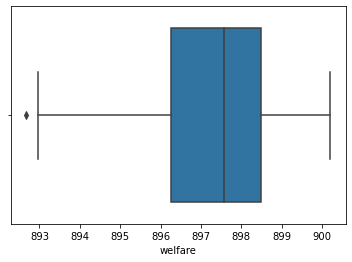

In [37]:
df2['welfare'] += df2['traveltime']
statusCounts(df2['welfare'])

Статистика по : studytime
Всего : 395
Уникальных : 4
Сумма уникальных : 388
Пустых : 7


2.0    194
1.0    103
3.0     64
4.0     27
Name: studytime, dtype: int64

count    388.000000
mean       2.038660
std        0.842078
min        1.000000
25%        1.000000
50%        2.000000
75%        2.000000
max        4.000000
Name: studytime, dtype: float64

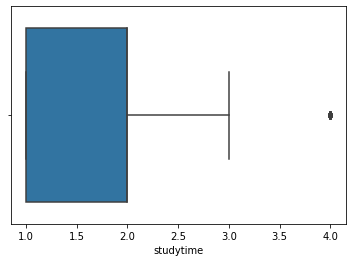

In [38]:
statusCounts(df['studytime'])

4 = 100 б
3 = 98 б
2 = 96 б
1 = 90 б
пропуски = 96

Статистика по : studytime
Всего : 395
Уникальных : 4
Сумма уникальных : 395
Пустых : 0


96.0     201
90.0     103
98.0      64
100.0     27
Name: studytime, dtype: int64

count    395.000000
mean      95.032911
std        3.196831
min       90.000000
25%       90.000000
50%       96.000000
75%       96.000000
max      100.000000
Name: studytime, dtype: float64

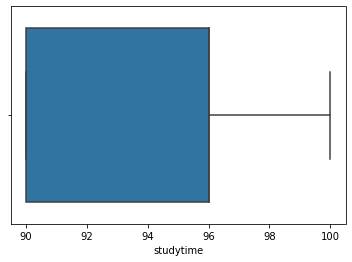

In [39]:
df2['studytime'] = df2['studytime'].map({1: 90,
                                         2: 96,
                                         3: 98,
                                         4: 100})

df2['studytime'] = df2['studytime'].fillna(96)
statusCounts(df2['studytime'])

Статистика по : welfare
Всего : 395
Уникальных : 306
Сумма уникальных : 395
Пустых : 0


994.275    6
993.975    5
992.400    4
994.875    4
995.290    3
          ..
993.600    1
998.400    1
989.675    1
991.345    1
987.465    1
Name: welfare, Length: 306, dtype: int64

count    395.000000
mean     992.305861
std        3.690708
min      983.255000
25%      989.595000
50%      993.400000
75%      994.900000
max      999.160000
Name: welfare, dtype: float64

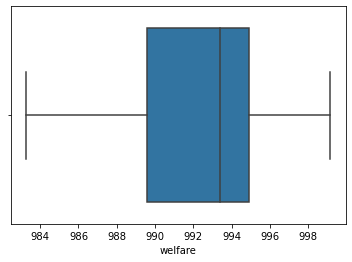

In [40]:
df2['welfare'] += df2['studytime']
statusCounts(df2['welfare'])

Статистика по : failures
Всего : 395
Уникальных : 4
Сумма уникальных : 373
Пустых : 22


0.0    293
1.0     49
2.0     16
3.0     15
Name: failures, dtype: int64

count    373.000000
mean       0.337802
std        0.743135
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        3.000000
Name: failures, dtype: float64

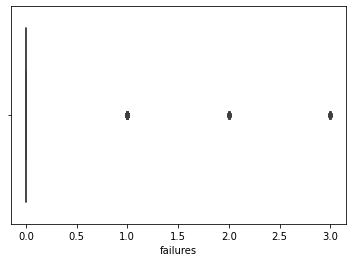

In [41]:
statusCounts(df['failures'])

Статистика по : schoolsup
Всего : 395
Уникальных : 2
Сумма уникальных : 386
Пустых : 9


no           335
yes           51
Undefined      9
Name: schoolsup, dtype: int64

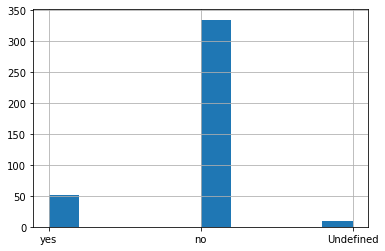

In [42]:
statusCounts(df['schoolsup'])

Yes = 100 б
No = 95 б
Пропуски = 97.5


Статистика по : schoolsup
Всего : 395
Уникальных : 3
Сумма уникальных : 395
Пустых : 0


95.0     335
100.0     51
97.5       9
Name: schoolsup, dtype: int64

count    395.000000
mean      95.702532
std        1.698235
min       95.000000
25%       95.000000
50%       95.000000
75%       95.000000
max      100.000000
Name: schoolsup, dtype: float64

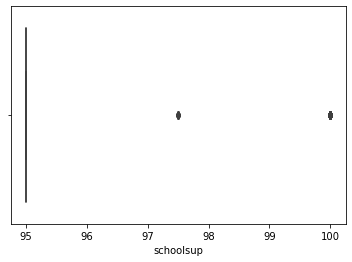

In [43]:
df2['schoolsup'] = df2['schoolsup'].map({'yes': 100,
                                         'no': 95})

df2['schoolsup'] = df2['schoolsup'].fillna(97.5)
statusCounts(df2['schoolsup'])

Статистика по : welfare
Всего : 395
Уникальных : 307
Сумма уникальных : 395
Пустых : 0


1089.275    7
1088.975    4
1087.275    4
1087.400    4
1089.900    4
           ..
1089.575    1
1089.565    1
1094.375    1
1083.065    1
1079.435    1
Name: welfare, Length: 307, dtype: int64

count     395.000000
mean     1088.008392
std         4.104372
min      1078.255000
25%      1085.190000
50%      1088.800000
75%      1090.575000
max      1099.160000
Name: welfare, dtype: float64

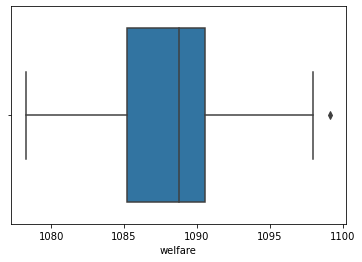

In [44]:
df2['welfare'] += df2['schoolsup']
statusCounts(df2['welfare'])

Статистика по : famsup
Всего : 395
Уникальных : 2
Сумма уникальных : 356
Пустых : 39


yes          219
no           137
Undefined     39
Name: famsup, dtype: int64

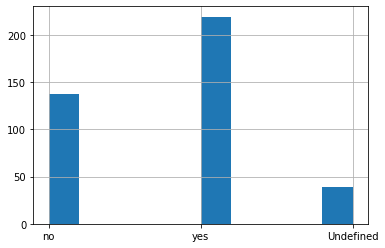

In [45]:
statusCounts(df['famsup'])

yes = 100б no = 97 б пропуски = 98.5 б

Статистика по : famsup
Всего : 395
Уникальных : 3
Сумма уникальных : 395
Пустых : 0


100.0    219
95.0     137
97.5      39
Name: famsup, dtype: int64

count    395.000000
mean      98.018987
std        2.318874
min       95.000000
25%       95.000000
50%      100.000000
75%      100.000000
max      100.000000
Name: famsup, dtype: float64

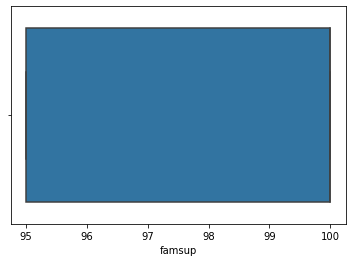

In [46]:
df2['famsup'] = df2['famsup'].map({'yes': 100,
                                   'no': 95})

df2['famsup'] = df2['famsup'].fillna(97.5)
statusCounts(df2['famsup'])

Статистика по : welfare
Всего : 395
Уникальных : 340
Сумма уникальных : 395
Пустых : 0


1189.275    6
1189.900    5
1187.575    3
1182.775    3
1182.275    3
           ..
1192.675    1
1186.945    1
1181.670    1
1183.275    1
1174.755    1
Name: welfare, Length: 340, dtype: int64

count     395.000000
mean     1186.027380
std         5.122352
min      1173.360000
25%      1182.472500
50%      1186.700000
75%      1189.875000
max      1199.160000
Name: welfare, dtype: float64

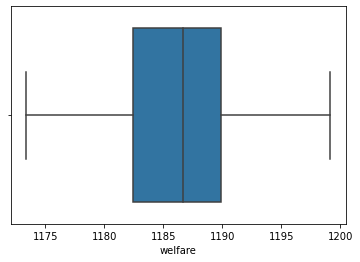

In [47]:
df2['welfare'] += df2['famsup']
statusCounts(df2['welfare'])

Статистика по : paid
Всего : 395
Уникальных : 2
Сумма уникальных : 355
Пустых : 40


no           200
yes          155
Undefined     40
Name: paid, dtype: int64

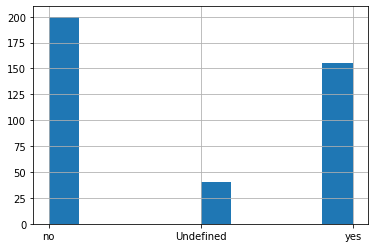

In [48]:
statusCounts(df['paid'])

yes = 100б no = 95 б пропуски = 97.5б

Статистика по : paid
Всего : 395
Уникальных : 3
Сумма уникальных : 395
Пустых : 0


95.0     200
100.0    155
97.5      40
Name: paid, dtype: int64

count    395.000000
mean      97.215190
std        2.355849
min       95.000000
25%       95.000000
50%       95.000000
75%      100.000000
max      100.000000
Name: paid, dtype: float64

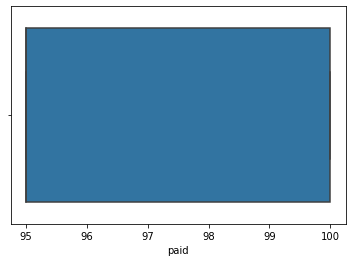

In [49]:
df2['paid'] = df2['paid'].map({'yes': 100,
                               'no': 95})

df2['paid'] = df2['paid'].fillna(97.5)
statusCounts(df2['paid'])

Статистика по : welfare
Всего : 395
Уникальных : 353
Сумма уникальных : 395
Пустых : 0


1284.275    4
1284.900    4
1287.575    3
1279.965    3
1289.275    3
           ..
1276.550    1
1277.665    1
1281.400    1
1269.475    1
1286.670    1
Name: welfare, Length: 353, dtype: int64

count     395.000000
mean     1283.242570
std         6.244827
min      1268.360000
25%      1278.682500
50%      1283.975000
75%      1288.087500
max      1297.975000
Name: welfare, dtype: float64

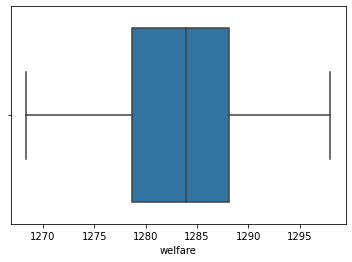

In [50]:
df2['welfare'] += df2['paid']
statusCounts(df2['welfare'])

Статистика по : activities
Всего : 395
Уникальных : 2
Сумма уникальных : 381
Пустых : 14


yes          195
no           186
Undefined     14
Name: activities, dtype: int64

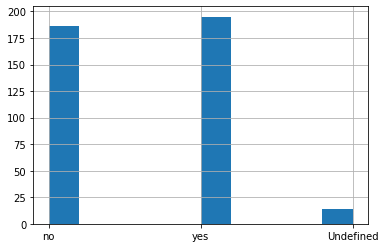

In [51]:
statusCounts(df['activities'])

yes = 100б no = 99б пропуски 99.5 б

Статистика по : activities
Всего : 395
Уникальных : 3
Сумма уникальных : 395
Пустых : 0


100.0    195
99.0     186
99.5      14
Name: activities, dtype: int64

count    395.000000
mean      99.511392
std        0.491550
min       99.000000
25%       99.000000
50%       99.500000
75%      100.000000
max      100.000000
Name: activities, dtype: float64

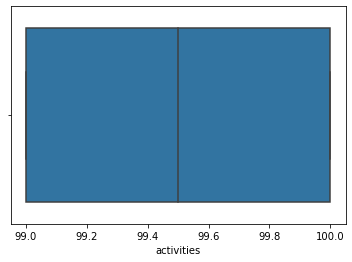

In [52]:
df2['activities'] = df2['activities'].map({'yes': 100,
                                           'no': 99})

df2['activities'] = df2['activities'].fillna(99.5)
statusCounts(df2['activities'])

Статистика по : welfare
Всего : 395
Уникальных : 346
Сумма уникальных : 395
Пустых : 0


1383.900    4
1383.275    4
1382.575    4
1387.900    3
1389.900    3
           ..
1390.600    1
1376.975    1
1388.000    1
1368.475    1
1386.575    1
Name: welfare, Length: 346, dtype: int64

count     395.000000
mean     1382.753962
std         6.311428
min      1367.360000
25%      1377.937500
50%      1383.400000
75%      1387.622500
max      1396.975000
Name: welfare, dtype: float64

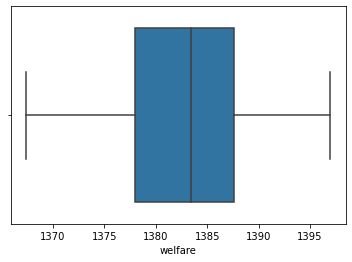

In [53]:
df2['welfare'] += df2['activities']
statusCounts(df2['welfare'])

Статистика по : nursery
Всего : 395
Уникальных : 2
Сумма уникальных : 379
Пустых : 16


yes          300
no            79
Undefined     16
Name: nursery, dtype: int64

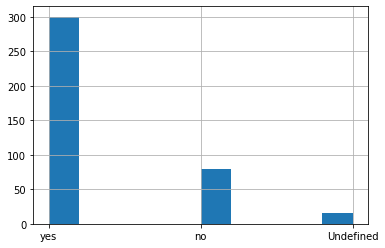

In [54]:
statusCounts(df['nursery'])

yes = 100 б no = 70 б пропуски 85 б

Статистика по : nursery
Всего : 395
Уникальных : 3
Сумма уникальных : 395
Пустых : 0


100.0    300
70.0      79
85.0      16
Name: nursery, dtype: int64

count    395.000000
mean      93.392405
std       12.075711
min       70.000000
25%      100.000000
50%      100.000000
75%      100.000000
max      100.000000
Name: nursery, dtype: float64

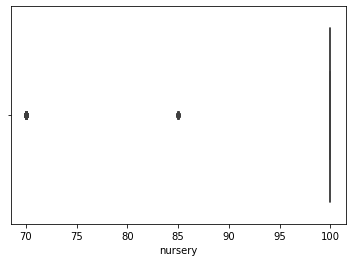

In [55]:
df2['nursery'] = df2['nursery'].map({'yes': 100,
                                     'no': 70})

df2['nursery'] = df2['nursery'].fillna(85)
statusCounts(df2['nursery'])

Статистика по : welfare
Всего : 395
Уникальных : 359
Сумма уникальных : 395
Пустых : 0


1483.275    4
1487.500    3
1489.900    3
1483.900    3
1487.900    3
           ..
1459.665    1
1469.000    1
1476.690    1
1488.665    1
1496.575    1
Name: welfare, Length: 359, dtype: int64

count     395.000000
mean     1476.146367
std        14.546778
min      1438.755000
25%      1470.950000
50%      1481.055000
75%      1486.977500
max      1496.975000
Name: welfare, dtype: float64

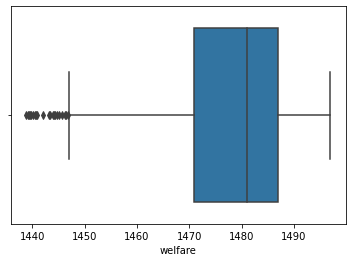

In [56]:
df2['welfare'] += df2['nursery']
statusCounts(df2['welfare'])

Статистика по : studytime, granular
Всего : 395
Уникальных : 4
Сумма уникальных : 388
Пустых : 7


-6.0     194
-3.0     103
-9.0      64
-12.0     27
Name: studytime, granular, dtype: int64

count    388.000000
mean      -6.115979
std        2.526235
min      -12.000000
25%       -6.000000
50%       -6.000000
75%       -3.000000
max       -3.000000
Name: studytime, granular, dtype: float64

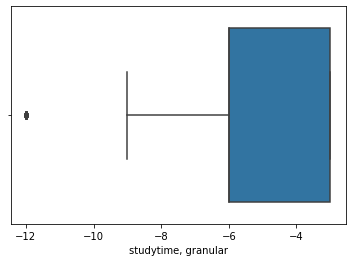

In [57]:
statusCounts(df['studytime, granular'])

Статистика по : higher
Всего : 395
Уникальных : 2
Сумма уникальных : 375
Пустых : 20


yes          356
Undefined     20
no            19
Name: higher, dtype: int64

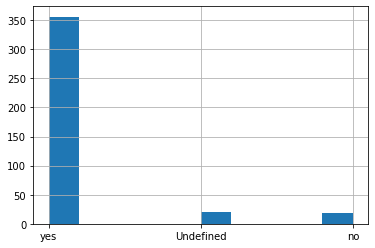

In [58]:
statusCounts(df['higher'])

yes = 100б no = 70 б пропуски = 85 б

Статистика по : higher
Всего : 395
Уникальных : 3
Сумма уникальных : 395
Пустых : 0


100.0    356
85.0      20
70.0      19
Name: higher, dtype: int64

count    395.000000
mean      97.797468
std        7.068159
min       70.000000
25%      100.000000
50%      100.000000
75%      100.000000
max      100.000000
Name: higher, dtype: float64

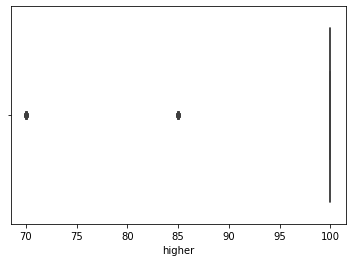

In [59]:
df2['higher'] = df2['higher'].map({'yes': 100,
                                   'no': 70})

df2['higher'] = df2['higher'].fillna(85)
statusCounts(df2['higher'])

Статистика по : welfare
Всего : 395
Уникальных : 361
Сумма уникальных : 395
Пустых : 0


1583.275    3
1583.900    3
1582.575    3
1589.900    3
1578.965    3
           ..
1590.900    1
1589.075    1
1582.200    1
1582.400    1
1555.575    1
Name: welfare, Length: 361, dtype: int64

count     395.000000
mean     1573.943835
std        17.315824
min      1509.770000
25%      1563.467500
50%      1580.165000
75%      1586.667500
max      1596.975000
Name: welfare, dtype: float64

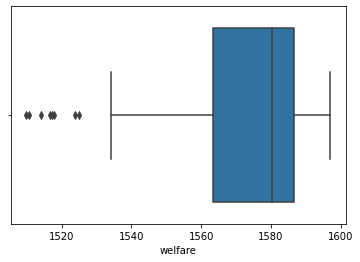

In [60]:
df2['welfare'] += df2['higher']
statusCounts(df2['welfare'])

Статистика по : internet
Всего : 395
Уникальных : 2
Сумма уникальных : 361
Пустых : 34


yes          305
no            56
Undefined     34
Name: internet, dtype: int64

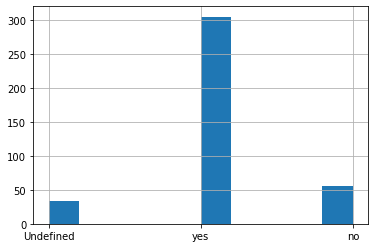

In [61]:
statusCounts(df['internet'])

yes = 100б no = 85 б пропуски = 92.5 б

Статистика по : internet
Всего : 395
Уникальных : 3
Сумма уникальных : 395
Пустых : 0


100.0    305
85.0      56
92.5      34
Name: internet, dtype: int64

count    395.000000
mean      97.227848
std        5.397168
min       85.000000
25%      100.000000
50%      100.000000
75%      100.000000
max      100.000000
Name: internet, dtype: float64

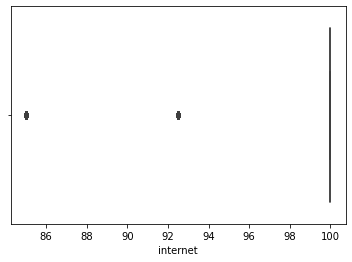

In [62]:
df2['internet'] = df2['internet'].map({'yes': 100,
                                       'no': 85})

df2['internet'] = df2['internet'].fillna(92.5)
statusCounts(df2['internet'])

Статистика по : welfare
Всего : 395
Уникальных : 363
Сумма уникальных : 395
Пустых : 0


1682.575    3
1678.965    3
1687.500    3
1689.900    3
1683.900    3
           ..
1686.660    1
1687.670    1
1683.090    1
1669.290    1
1680.465    1
Name: welfare, Length: 363, dtype: int64

count     395.000000
mean     1671.741304
std        22.090372
min      1579.770000
25%      1659.322500
50%      1680.165000
75%      1686.667500
max      1696.975000
Name: welfare, dtype: float64

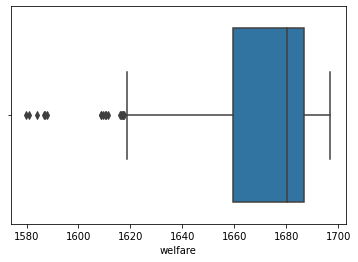

In [63]:
df2['welfare'] += df2['higher']
statusCounts(df2['welfare'])

Статистика по : romantic
Всего : 395
Уникальных : 2
Сумма уникальных : 364
Пустых : 31


no           240
yes          124
Undefined     31
Name: romantic, dtype: int64

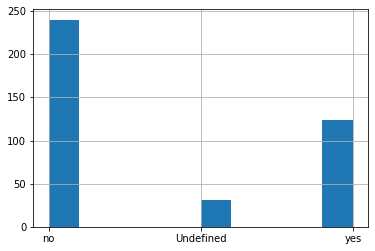

In [64]:
statusCounts(df['romantic'])

Статистика по : romantic
Всего : 395
Уникальных : 3
Сумма уникальных : 395
Пустых : 0


100.0    240
95.0     124
97.5      31
Name: romantic, dtype: int64

count    395.000000
mean      98.234177
std        2.287734
min       95.000000
25%       95.000000
50%      100.000000
75%      100.000000
max      100.000000
Name: romantic, dtype: float64

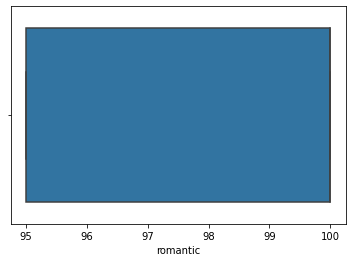

In [65]:
df2['romantic'] = df2['romantic'].map({'yes': 95,
                                       'no': 100})

df2['romantic'] = df2['romantic'].fillna(97.5)
statusCounts(df2['romantic'])

Статистика по : welfare
Всего : 395
Уникальных : 359
Сумма уникальных : 395
Пустых : 0


1778.965    3
1778.275    3
1787.465    3
1786.675    3
1787.375    2
           ..
1776.400    1
1779.675    1
1788.200    1
1769.365    1
1719.055    1
Name: welfare, Length: 359, dtype: int64

count     395.000000
mean     1769.975481
std        22.289585
min      1675.770000
25%      1757.972500
50%      1777.990000
75%      1785.370000
max      1796.870000
Name: welfare, dtype: float64

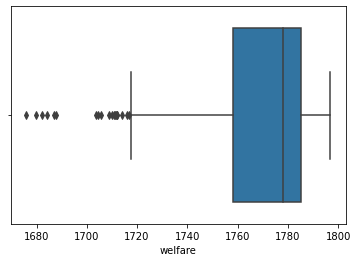

In [66]:
df2['welfare'] += df2['romantic']
statusCounts(df2['welfare'])

Статистика по : famrel
Всего : 395
Уникальных : 6
Сумма уникальных : 368
Пустых : 27


 4.0    182
 5.0     99
 3.0     62
 2.0     17
 1.0      7
-1.0      1
Name: famrel, dtype: int64

count    368.000000
mean       3.937500
std        0.927277
min       -1.000000
25%        4.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: famrel, dtype: float64

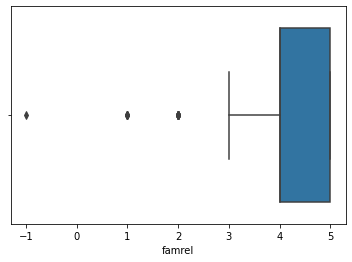

In [67]:
statusCounts(df['famrel'])

1 = 92 б

2 = 94 б

3 = 96 б

4 = 98 б

5 = 100 б

Пропуски 96 б


Статистика по : famrel
Всего : 395
Уникальных : 4
Сумма уникальных : 395
Пустых : 0


96.0     271
100.0     99
94.0      17
92.0       8
Name: famrel, dtype: int64

count    395.000000
mean      96.835443
std        1.953978
min       92.000000
25%       96.000000
50%       96.000000
75%       98.000000
max      100.000000
Name: famrel, dtype: float64

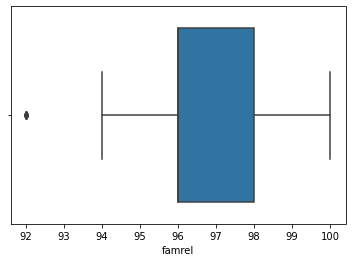

In [68]:
df2['famrel'] = df2['famrel'].map({1: 92,
                                   -1: 92,
                                   2: 94,
                                   3: 96,
                                   4: 96,
                                   5: 100
                                   })

df2['famrel'] = df2['famrel'].fillna(96)
statusCounts(df2['famrel'])

Статистика по : welfare
Всего : 395
Уникальных : 366
Сумма уникальных : 395
Пустых : 0


1878.275    3
1875.275    3
1883.465    3
1868.975    2
1877.275    2
           ..
1889.800    1
1886.400    1
1883.380    1
1851.575    1
1842.500    1
Name: welfare, Length: 366, dtype: int64

count     395.000000
mean     1866.810924
std        22.330297
min      1775.770000
25%      1856.472500
50%      1874.945000
75%      1881.452500
max      1896.575000
Name: welfare, dtype: float64

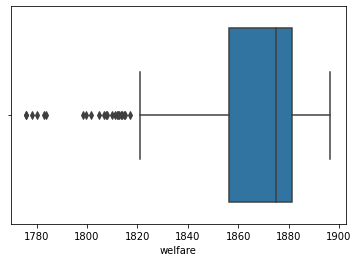

In [69]:
df2['welfare'] += df2['famrel']
statusCounts(df2['welfare'])

Статистика по : freetime
Всего : 395
Уникальных : 5
Сумма уникальных : 384
Пустых : 11


3.0    153
4.0    112
2.0     63
5.0     38
1.0     18
Name: freetime, dtype: int64

count    384.000000
mean       3.231771
std        0.993940
min        1.000000
25%        3.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: freetime, dtype: float64

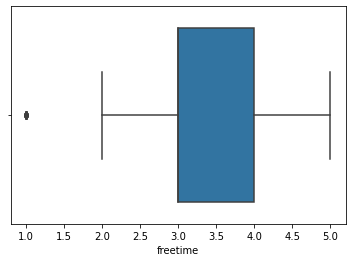

In [70]:
statusCounts(df['freetime'])

Сложно зделать вывод ... Если связать с другими данными, можно было бы...

Статистика по : goout
Всего : 395
Уникальных : 5
Сумма уникальных : 387
Пустых : 8


3.0    127
2.0    101
4.0     84
5.0     52
1.0     23
Name: goout, dtype: int64

count    387.000000
mean       3.105943
std        1.115896
min        1.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: goout, dtype: float64

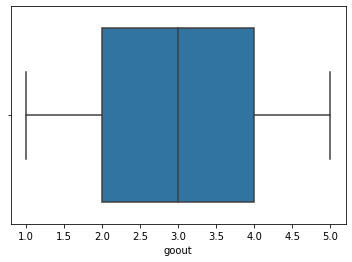

In [71]:
statusCounts(df['goout'])

Сложно зделать вывод ... Если связать с другими данными, можно было бы...

Статистика по : health
Всего : 395
Уникальных : 5
Сумма уникальных : 380
Пустых : 15


5.0    138
3.0     89
4.0     63
1.0     47
2.0     43
Name: health, dtype: int64

count    380.000000
mean       3.531579
std        1.396019
min        1.000000
25%        3.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: health, dtype: float64

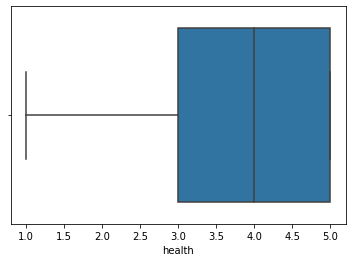

In [72]:
statusCounts(df['health'])

1 = 98 б

2 = 98.5 б

3 = 99 б

4 = 99.5 б

5 = 100 б

Пропуски 99 б


Статистика по : health
Всего : 395
Уникальных : 5
Сумма уникальных : 395
Пустых : 0


100.0    138
99.0     104
99.5      63
98.0      47
98.5      43
Name: health, dtype: int64

count    395.000000
mean      99.255696
std        0.686481
min       98.000000
25%       99.000000
50%       99.500000
75%      100.000000
max      100.000000
Name: health, dtype: float64

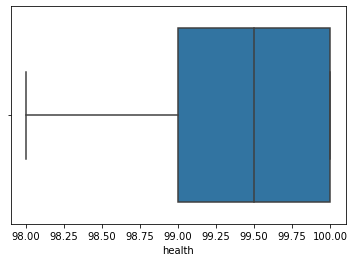

In [73]:
df2['health'] = df2['health'].map({1: 98,
                                   2: 98.5,
                                   3: 99,
                                   4: 99.5,
                                   5: 100
                                   })

df2['health'] = df2['health'].fillna(99)
statusCounts(df2['health'])

Статистика по : welfare
Всего : 395
Уникальных : 369
Сумма уникальных : 395
Пустых : 0


1976.775    3
1977.575    3
1974.400    3
1979.790    2
1981.300    2
           ..
1953.675    1
1984.175    1
1985.100    1
1937.965    1
1953.665    1
Name: welfare, Length: 369, dtype: int64

count     395.000000
mean     1966.066620
std        22.312492
min      1873.770000
25%      1955.722500
50%      1973.965000
75%      1980.820000
max      1995.575000
Name: welfare, dtype: float64

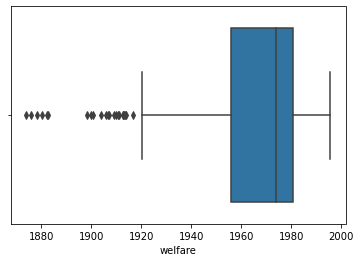

In [74]:
df2['welfare'] += df2['health']
statusCounts(df2['welfare'])

Статистика по : absences
Всего : 395
Уникальных : 36
Сумма уникальных : 383
Пустых : 12


0.0      111
2.0       60
4.0       53
6.0       31
8.0       21
10.0      17
14.0      12
12.0      12
3.0        8
16.0       7
7.0        6
18.0       5
5.0        5
20.0       4
9.0        3
22.0       3
1.0        3
13.0       2
15.0       2
11.0       2
40.0       1
38.0       1
56.0       1
23.0       1
24.0       1
25.0       1
385.0      1
17.0       1
75.0       1
21.0       1
212.0      1
28.0       1
19.0       1
26.0       1
30.0       1
54.0       1
Name: absences, dtype: int64

count    383.000000
mean       7.279373
std       23.465197
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max      385.000000
Name: absences, dtype: float64

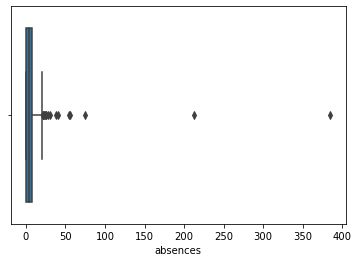

In [75]:
statusCounts(df['absences'])

Пасс...

Статистика по : score
Всего : 395
Уникальных : 18
Сумма уникальных : 389
Пустых : 6


50.0     54
55.0     46
0.0      37
75.0     33
65.0     31
60.0     31
40.0     31
45.0     27
70.0     27
80.0     16
30.0     15
90.0     12
35.0      9
25.0      7
85.0      6
95.0      5
20.0      1
100.0     1
Name: score, dtype: int64

count    389.000000
mean      52.262211
std       22.919022
min        0.000000
25%       40.000000
50%       55.000000
75%       70.000000
max      100.000000
Name: score, dtype: float64

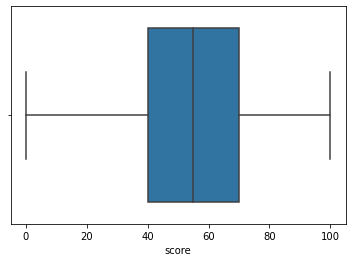

In [76]:
statusCounts(df['score'])

In [77]:
df2[['score', 'welfare']].corr()

,score,welfare
score,1.000000,0.175628
welfare,0.175628,1.000000


Статистика по : welfare
Всего : 395
Уникальных : 369
Сумма уникальных : 395
Пустых : 0


1976.775    3
1977.575    3
1974.400    3
1979.790    2
1981.300    2
           ..
1953.675    1
1984.175    1
1985.100    1
1937.965    1
1953.665    1
Name: welfare, Length: 369, dtype: int64

count     395.000000
mean     1966.066620
std        22.312492
min      1873.770000
25%      1955.722500
50%      1973.965000
75%      1980.820000
max      1995.575000
Name: welfare, dtype: float64

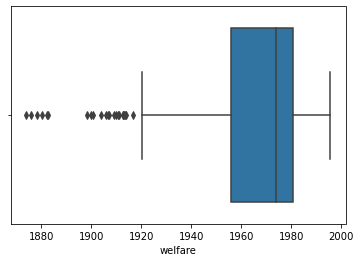

In [78]:
statusCounts(df2['welfare'])

In [79]:
IQR = df2['welfare'].quantile(q=0.75) - df2['welfare'].quantile(0.25)
perc25 = df2['welfare'].quantile(0.25)
perc75 = df2['welfare'].quantile(0.75)
high_border = perc75 + 1.5*IQR
low_border = perc25 - 1.5*IQR

df2 = df2[(df2['welfare'] > perc25) & (df2['welfare'] < perc75)]

Статистика по : welfare
Всего : 197
Уникальных : 180
Сумма уникальных : 197
Пустых : 0


1974.400    3
1976.775    3
1977.575    3
1972.375    2
1973.965    2
           ..
1973.480    1
1964.775    1
1970.380    1
1971.200    1
1957.680    1
Name: welfare, Length: 180, dtype: int64

count     197.000000
mean     1972.740685
std         6.012991
min      1955.775000
25%      1969.170000
50%      1973.965000
75%      1977.275000
max      1980.775000
Name: welfare, dtype: float64

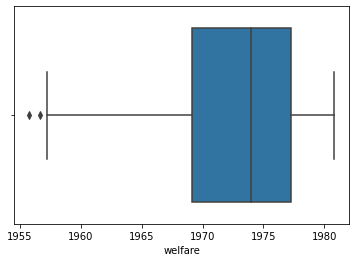

In [80]:
statusCounts(df2['welfare'])

In [81]:
df2[['score', 'welfare']].corr()

,score,welfare
score,1.000000,-0.039765
welfare,-0.039765,1.000000


In [82]:
df2.corr()

,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,traveltime,...,higher,internet,romantic,famrel,freetime,goout,health,absences,score,welfare
age,1.000000,-0.120745,-0.002838,0.000098,-0.122291,-0.109508,-0.087189,-0.154602,-0.097002,-0.066381,...,0.097639,-0.090908,-0.090099,0.040616,-0.107843,0.134138,-0.018422,0.026996,-0.117076,-0.070727
address,-0.120745,1.000000,-0.141385,-0.069652,0.138175,0.043130,0.021840,0.011943,-0.087443,0.315345,...,-0.042695,0.144694,-0.015652,-0.050140,-0.038820,-0.045198,-0.064817,0.030810,0.182002,0.107706
famsize,-0.002838,-0.141385,1.000000,0.086215,0.064752,0.054094,-0.069374,0.086974,-0.042227,-0.072217,...,-0.050983,0.018712,0.019068,0.111078,-0.010627,-0.007319,0.021961,0.036975,-0.089128,0.007650
Pstatus,0.000098,-0.069652,0.086215,1.000000,-0.103954,-0.058442,-0.004661,-0.084366,0.133604,-0.013171,...,-0.034402,0.015429,0.005172,-0.004372,0.029695,-0.021787,-0.019011,-0.013079,-0.132519,-0.012277
Medu,-0.122291,0.138175,0.064752,-0.103954,1.000000,0.607611,0.454388,0.286939,-0.013725,0.174122,...,-0.073754,0.173481,-0.125965,-0.010493,0.039522,0.026879,-0.032321,0.005997,0.230596,0.184058
Fedu,-0.109508,0.043130,0.054094,-0.058442,0.607611,1.000000,0.206264,0.337585,0.026083,0.026055,...,-0.032057,0.083744,-0.085945,-0.101371,0.016429,0.011236,-0.038869,0.057966,0.114847,0.165235
Mjob,-0.087189,0.021840,-0.069374,-0.004661,0.454388,0.206264,1.000000,0.115468,-0.055108,0.079485,...,-0.143147,0.312537,-0.053825,-0.065439,0.120205,-0.074993,0.069414,0.006669,0.204108,-0.039891
Fjob,-0.154602,0.011943,0.086974,-0.084366,0.286939,0.337585,0.115468,1.000000,0.065114,-0.023793,...,0.044426,-0.104508,0.013997,-0.085394,0.001621,0.001284,0.053792,0.203770,0.123496,0.218006
reason,-0.097002,-0.087443,-0.042227,0.133604,-0.013725,0.026083,-0.055108,0.065114,1.000000,-0.009534,...,-0.077325,-0.084307,-0.027927,-0.080209,0.088928,-0.019514,0.136041,-0.010355,0.028314,0.114442
traveltime,-0.066381,0.315345,-0.072217,-0.013171,0.174122,0.026055,0.079485,-0.023793,-0.009534,1.000000,...,0.102848,0.098922,-0.099658,0.068842,0.064455,-0.035656,-0.097209,0.051258,0.120353,0.175140
